# Quantitative simulation of photopigment bleaching

This notebook implements a reproducible computational framework for estimating photopigment bleaching under brief flash stimulation using a first-order (exponential) depletion model.

Two equivalent routes are supported:

1. **Photometric route (Trolands)** – uses conventional retinal illuminance $T$ (Td) and the luminous exposure constant $Q_e$ (Td·s).

2. **Radiometric route (photons)** – computes photon density (photons/$\mu$m²) from radiant power.

## Notation

| Symbol | Meaning | Units |
|:------:|:--------:|:------:|
| $p(t)$ | Remaining photopigment fraction | – |
| $p_0$ | Initial photopigment fraction | – |
| $B$ | Bleaching fraction | – |
| $T$ | Retinal illuminance | Td |
| $Q_e$ | Luminous exposure constant | Td·s |
| $P_e$ | | W |
| $P_e(\lambda)$ | Spectral radiant power | W·nm$^{-1}$ |
| $P_v$ | Photopic luminous power | lm |
| $V(\lambda)$ | Photopic luminous efficiency | – |
| $K_m$ | Photopic luminous efficacy constant (683) | lm·W$^{-1}$ |
| $A$ | Illuminated retinal area | m$^2$ |
| $r$ | Nodal distance to retina | m |
| $\Omega$ | Solid angle subtended by stimulus | sr |
| $d$ | Retinal stimulus diameter | m |
| $t$ | Flash duration | s |
| $N$ | Total photon count | – |
| $D$ | Photon density | photons·m$^{-2}$ |
| $D_{\mu m^2}$ | Photon density | photons·$\mu$m$^{-2}$ |
| $h$ | Planck’s constant | J·s |
| $c$ | Speed of light | m·s$^{-1}$ |
| $\lambda$ | Stimulus wavelength | m |



---

## 1. First-order bleaching model

Bleaching is modeled as a first-order depletion process:

$$
p(t) = p_0\exp\!\left(-\frac{T t}{Q_e}\right)
$$

where:

- $p(t)$ = fraction of remaining photopigment
- $p_0$ = initial photopigment fraction
- $T$ = retinal illuminance (Trolands, Td)  
- $t$ = flash duration (seconds)  
- $Q_e$ = characteristic luminous exposure (Td·s)

The bleaching fraction is

$$
B = 1 - p(t)
$$

A commonly used value is  $Q_e \approx 2.4 \times 10^6 \ \text{Td·s}$  
following Rushton & Henry (1968).

---

## 2. Solving for required retinal illuminance

Given a target bleaching fraction leading to

$$
1 - B = \exp\!\left(-\frac{T t}{Q_e}\right)
$$

For normalized analysis, $p_0 = 1$ is assumed in subsequent derivations.


Taking the natural logarithm:

$$
\ln(1 - B) = -\frac{T t}{Q_e}
$$

Solving for $T$:

$$
T = -\frac{Q_e}{t} \ln(1 - B)
$$

---

## 3. Radiant power to Trolands conversion

Let $P_e(\lambda)$ denote the spectral radiant power (W·nm$^{-1}$) of the stimulus at wavelength $\lambda$, and let $V(\lambda)$ denote the CIE 1931 photopic luminous efficiency function (dimensionless, normalized to unity at 555 nm). The corresponding photopic luminous power $P_v$ (lumens) is

$$
P_v = K_m \int_{\lambda_1}^{\lambda_2} P_e(\lambda)\, V(\lambda)\, d\lambda,
$$
where $K_m = 683$ lm·W$^{-1}$ is the photopic luminous efficacy constant.

For monochromatic illumination at wavelength $\lambda$ with total radiant power $P_e$ (W), the integral reduces to

$$
P_v = K_m\, P_e\, V(\lambda).
$$

Retinal illuminance $T$ (Trolands, Td) can be expressed in terms of luminous power per unit solid angle subtended by the illuminated retinal patch:

$$
T = P_v \Omega^{-1} \times 10^6,
$$

where $\Omega$ (sr) is the solid angle subtended by the illuminated retinal area as viewed from the eye’s nodal point.

The factor $10^6$ arises from unit scaling embedded in this geometric formulation. In the present derivation, the illuminated retinal area $A$ is expressed in square meters, whereas classical photometric formulations of retinal illuminance implicitly assume area expressed in square millimeters. Since

$$
1 \ \mathrm{m}^2 = 10^6 \ \mathrm{mm}^2,
$$

the factor $10^6$ ensures consistency between the geometric solid-angle approximation and the conventional definition of Trolands, thereby preserving dimensional compatibility with the luminous exposure constant $Q_e$ expressed in Td·s.

Under a small-angle geometric approximation, the solid angle is

$$
\Omega \approx \frac{A}{r^2},
$$

where $A$ is the illuminated retinal area (m$^2$) and $r$ is the nodal distance to the retina (m). Substituting this expression yields

$$
T = K_m\, P_e\, V(\lambda)
\left(\frac{r^2}{A}\right)
\times 10^6.
$$

This geometric formulation is equivalent to the classical definition of Trolands under uniform illumination and the small-angle approximation.


---

## 4. Closed-form bleaching relationships

This section presents both directions of the bleaching model:

- **Forward problem:** Given radiant power, compute Bleach %.  
- **Inverse problem:** Given target Bleach %, compute required radiant power.

---

### 4.1 Forward problem (Radiant power → Bleach %)

Given radiant power $P_e$ (W), the corresponding retinal illuminance $T$ (Td) under the geometric approximation is

$$
T = K_m\, P_e\, V(\lambda)\left(\frac{r^2}{A}\right)\times 10^6.
$$

Substituting this into the first-order bleaching model,

$$
p(t)=\exp\!\left(-\frac{T t}{Q_e}\right),
$$

the bleaching fraction becomes

$$
B = 1 - p(t)
  = 1 - \exp\!\left(-\frac{T t}{Q_e}\right)
  = 1 - \exp\!\left(
      -\frac{
        K_m\, P_e\, V(\lambda)\left(\frac{r^2}{A}\right)\times 10^6 \, t
      }{
        Q_e
      }
    \right).
$$

The bleaching percentage is

$$
\text{Bleach \ %} = 100\,B.
$$

For power specified in microwatts, use $ P_e(\text{W}) = P_e(\mu\text{W}) \times 10^{-6} $ before substitution.

---

### 4.2 Inverse problem (Target bleach % → Required radiant power)

Equating the geometric expression for retinal illuminance with the bleaching requirement yields

$$
K_m P_e V(\lambda)\left(\frac{r^2}{A}\right) \times 10^6
=
-\frac{Q_e}{t} \ln(1 - B).
$$

Solving for radiant power $P_e$ gives

$$
P_e
=
\frac{-Q_e \ln(1 - B)}{t K_m V(\lambda)}
\left(\frac{A}{r^2}\right)
\times 10^{-6}.
$$

This expression provides the radiant power required to achieve a target bleaching fraction $B$ at wavelength $\lambda$ and flash duration $t$.

Radiant power is expressed in watts (W). For experimental convenience, $ P_e(\mu\text{W}) = P_e(\text{W}) \times 10^6. $


---
## 5. Retinal area from stimulus diameter

For a circular stimulus projected onto the retina, the illuminated retinal area $A$ is

$$
A = \pi \left(\frac{d}{2}\right)^2,
$$

where

- $A$ is the illuminated retinal area (m$^2$),  
- $d$ is the stimulus diameter on the retina (m).

If the diameter is specified in micrometers ($\mu$m), it must be converted to meters before substitution:

$$
d \; (\text{m}) = d \; (\mu\text{m}) \times 10^{-6}.
$$

This circular formulation is appropriate for Maxwellian-view or pupil-conjugated optical systems, where the retinal stimulus is defined by an aperture stop and forms an approximately uniform circular patch on the retina. Even for Gaussian beams truncated by a circular aperture, the stimulated region is well approximated by a circular geometry under the uniform irradiance assumption adopted here.

---

## 6. Photon density

This section provides the radiometric route for reporting stimulus strength in photon units (photon count and photon density), which can be used to compare stimuli independent of photopic weighting.


Photon energy is given by

$$
E_\gamma = \frac{h c}{\lambda},
$$

where

- $E_\gamma$ is the energy per photon (J),  
- $h = 6.626 \times 10^{-34}$ J·s is Planck’s constant,  
- $c = 3.00 \times 10^8$ m·s$^{-1}$ is the speed of light in vacuum,  
- $\lambda$ is the stimulus wavelength (m).

The total number of photons delivered during a flash of duration $t$ is

$$
N = \frac{P_e t}{h c / \lambda},
$$

where

- $P_e$ is radiant power (W),  
- $t$ is flash duration (s),  
- $N$ is total photon count (dimensionless).

Photon density on the retina is

$$
D = \frac{N}{A},
$$

where

- $D$ is photon density (photons·m$^{-2}$),  
- $A$ is the illuminated retinal area (m$^2$).

For reporting in photons per square micrometer,

$$
D_{\mu\text{m}^2} = \frac{N}{A \times 10^{12}}.
$$

Together, these relationships provide a complete forward and inverse framework for designing and reporting photopigment bleaching levels under controlled flash stimulation.


# Assumptions

- First-order bleaching kinetics (no regeneration during flash)
- Monochromatic illumination
- Photopic luminous efficiency evaluated at stimulus wavelength
- Ocular transmission = 1
- Uniform retinal irradiance
- Small-angle solid-angle approximation $\Omega \approx A / r^2$

---

# References

Rushton WA, Henry GH. *Bleaching and regeneration of cone pigments in man.* Vision Research, 1968.

CIE 1931 photopic luminous efficiency function and luminous efficacy constant $K_m = 683 \ \text{lm/W}$.

Commission Internationale de l'Éclairage (CIE). CIE spectral luminous efficiency for photopic vision (CIE 1931 standard observer). 
CIE S 026/E:2018 dataset, 2019.  Available at: https://cie.co.at/datatable/cie-spectral-luminous-efficiency-photopic-vision


Thibos LN. *What is a troland?* JOSA A, 2018.

Vienola KV, Valente D, Zawadzki RJ, & Jonnal RS. Velocity-based optoretinography for clinical applications. *Optica.* 2022;9(10):1100–1108. https://doi.org/10.1364/optica.460835.


In [98]:
# Cell 1 — Imports and physical constants
import numpy as np

# Physical constants
h = 6.62607015e-34  # J·s
c = 299792458       # m/s

# Photometric constant
Km = 683.0          # lm/W (photopic luminous efficacy constant)

# Default bleaching constant (update if you use a different convention)
Qe = 2.4e6          # Td·s (Rushton & Henry convention)

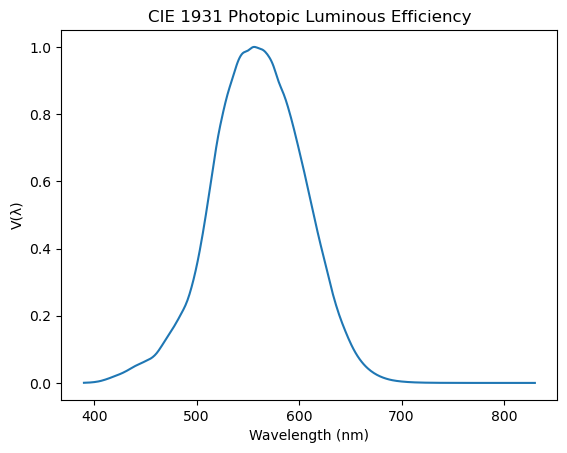

In [99]:
# Cell 2 — CIE 1931 photopic luminous efficiency V(λ)
#The photopic luminous efficiency function $V(\lambda)$ was obtained from the official CIE 1931 standard observer dataset (CIE, 2019),
# using the tabulated energy-based linear values sampled at 1 nm intervals.
#Commission Internationale de l'Éclairage (CIE). 
#CIE spectral luminous efficiency for photopic vision (CIE 1931 standard observer). 
#CIE S 026/E:2018 dataset, 2019.  Available at: https://cie.co.at/datatable/cie-spectral-luminous-efficiency-photopic-vision

import numpy as np
import matplotlib.pyplot as plt

# Wavelength grid (390–830 nm, 1 nm spacing)
wl_nm = np.arange(390, 831, 1)

# Corresponding V(λ) values (energy linear)
V_tab = np.array([
0.000414616,0.000502833,0.000608499,0.000734444,0.000883739,0.00105965,0.00126553,0.00150475,0.00178049,0.00209557,0.00245219,0.00285222,0.00329912,0.00379747,0.00435277,0.00497172,0.00566101,0.00642161,0.00725031,0.00814017,
0.00907986,0.0100561,0.0110646,0.0121052,0.0131801,0.0142938,0.01545,0.0166409,0.017853,0.0190702,0.0202737,0.0214481,0.0226004,0.0237479,0.0249125,0.0261211,0.0273992,0.0287499,0.0301691,0.0316514,
0.0331904,0.0347791,0.0364149,0.0380957,0.0398184,0.0415794,0.043371,0.0451718,0.0469542,0.0486872,0.0503366,0.0518761,0.0533222,0.054706,0.0560634,0.0574339,0.0588511,0.0603081,0.0617864,0.0632657,0.0647235,0.0661475,0.0675726,0.0690493,0.0706328,
0.0723834,0.0743596,0.0765938,0.0791144,0.0819535,0.0851482,0.0887266,0.0926601,0.0968972,0.101375,0.106014,0.110738,0.115511,0.120312,0.125116,0.129896,0.13463,0.139331,0.144023,0.148737,
0.153507,0.158364,0.16332,0.168376,0.173537,0.178805,0.184182,0.189656,0.19521,0.200826,0.206483,0.212183,0.218028,0.224159,0.23073,0.237916,0.245871,0.254602,0.264076,0.274249,0.285068,0.296484,0.308501,0.321139,0.334418,
0.348354,0.36296,0.378228,0.394136,0.410658,0.42776,0.445399,0.46354,0.482138,0.501143,0.520497,0.540139,0.560021,0.580097,0.600317,0.620626,0.64094,0.661077,0.680813,0.699904,0.718089,0.735159,0.751182,0.766314,0.780735,
0.794645,0.808207,0.821382,0.83407,0.846171,0.85758,0.868241,0.878306,0.887991,0.897521,0.907135,0.916995,0.926929,0.936673,0.945948,0.954468,0.961983,0.968439,0.973829,0.978152,0.981411,0.983667,0.985208,0.986381,0.987536,
0.989023,0.991081,0.993491,0.995917,0.998,0.999461,0.999993,0.999756,0.998984,0.997912,0.996774,0.995736,0.994711,0.993553,0.992116,0.990255,0.98786,0.984932,0.981504,0.977603,0.973261,0.968476,0.963137,0.957106,0.950254,
0.942457,0.93369,0.924289,0.914671,0.905233,0.896361,0.888307,0.880846,0.873645,0.866376,0.85872,0.85043,0.841505,0.832011,0.822015,0.811587,0.800787,0.789652,0.778205,0.766473,0.754479,0.742247,0.729823,0.717252,0.704582,
0.691855,0.679101,0.666285,0.653359,0.640281,0.627007,0.613515,0.599849,0.586068,0.572226,0.558375,0.544554,0.530767,0.517013,0.503289,0.489595,0.475944,0.462396,0.449015,0.435862,0.42299,0.410415,0.398036,0.38573,0.373391,
0.360924,0.348286,0.33557,0.322896,0.31037,0.298086,0.286116,0.274482,0.263195,0.252263,0.24169,0.231481,0.221638,0.212162,0.203054,0.194312,0.185923,0.177827,0.169965,0.162284,0.15474,0.147308,0.140017,0.132901,0.125991,
0.119312,0.112882,0.106711,0.100805,0.0951665,0.0897959,0.0846904,0.0798401,0.0752337,0.0708606,0.0667104,0.0627736,0.0590418,0.055507,0.0521614,0.048997,0.0460058,0.0431788,0.0405075,0.0379838,
0.0355998,0.0333486,0.0312233,0.0292178,0.027326,0.0255422,0.0238612,0.0222786,0.0207902,0.0193919,0.0180794,0.0168482,0.0156919,0.0146045,0.0135806,0.0126157,0.011707,0.0108561,0.0100648,0.00933338,
0.00866128,0.00804605,0.00748113,0.00695999,0.00647707,0.00602768,0.00560817,0.00521669,0.00485179,0.00451201,0.00419594,0.00390206,0.00362837,0.00337301,0.00313432,0.00291086,0.00270153,0.0025058,0.00232323,0.00215333,
0.00199556,0.00184932,0.00171398,0.0015889,0.00147345,0.00136702,0.00126895,0.00117842,0.00109464,0.00101694,0.000944727,0.000877517,0.000815044,0.000757076,0.000703376,0.000653705,0.000607805,0.000565344,0.000526005,0.000489506,
0.000455597,0.000424055,0.000394686,0.000367318,0.000341794,0.000317974,0.000295744,0.000275056,0.000255864,0.000238114,0.000221745,0.000206671,0.000192747,0.000179831,0.000167802,0.000156557,0.000146017,0.000136153,0.000126945,0.000118367,
0.000110393,0.000102991,9.61e-05,8.97e-05,8.38e-05,7.83e-05,7.31e-05,6.83e-05,6.39e-05,5.97e-05,5.58e-05,5.21e-05,4.87e-05,4.55e-05,4.26e-05,3.98e-05,3.73e-05,3.49e-05,3.26e-05,3.06e-05,2.86e-05,2.68e-05,2.50e-05,2.34e-05,2.19e-05,
2.05e-05,1.92e-05,1.80e-05,1.69e-05,1.59e-05,1.49e-05,1.40e-05,1.31e-05,1.23e-05,1.15e-05,1.08e-05,1.01e-05,9.51e-06,8.93e-06,8.38e-06,7.86e-06,7.38e-06,6.93e-06,6.51e-06,6.11e-06,5.74e-06,5.39e-06,5.07e-06,4.76e-06,4.48e-06,
4.21e-06,3.96e-06,3.73e-06,3.51e-06,3.30e-06,3.11e-06,2.92e-06,2.75e-06,2.58e-06,2.43e-06,2.29e-06,2.15e-06,2.03e-06,1.91e-06,1.80e-06,1.69e-06,1.60e-06,1.50e-06,1.42e-06,1.34e-06,1.26e-06,1.19e-06,1.12e-06,1.06e-06,9.99e-07,
9.42e-07,8.89e-07,8.39e-07,7.91e-07,7.47e-07,7.05e-07])

# Interpolating accessor (pulls values from the table above)
def V_lambda(wavelength_nm: float) -> float:
    """Return photopic luminous efficiency V(λ) by table lookup + linear interpolation."""
    if wavelength_nm < wl_nm[0] or wavelength_nm > wl_nm[-1]:
        raise ValueError(f"Wavelength must be within [{wl_nm[0]}, {wl_nm[-1]}] nm.")
    return float(np.interp(wavelength_nm, wl_nm, V_tab))


plt.plot(wl_nm, V_tab)
plt.xlabel("Wavelength (nm)")
plt.ylabel("V(λ)")
plt.title("CIE 1931 Photopic Luminous Efficiency")
plt.show()

In [100]:
# Cell 3 — Geometry helpers (Section 5) and photon helpers (Section 6)

def retinal_area_from_diameter_um(d_um: float) -> float:
    """Illuminated retinal area A in m^2 for a circular stimulus with diameter d in µm."""
    d_m = d_um * 1e-6
    return np.pi * (d_m / 2)**2

def photon_energy_J(wavelength_nm: float) -> float:
    """Photon energy E_gamma in joules for wavelength in nm."""
    lam_m = wavelength_nm * 1e-9
    return h * c / lam_m

def photon_count(Pe_W: float, t_s: float, wavelength_nm: float) -> float:
    """Total photon count N (dimensionless)."""
    return (Pe_W * t_s) / photon_energy_J(wavelength_nm)

def photon_density_per_um2(Pe_W: float, t_s: float, wavelength_nm: float, A_m2: float) -> float:
    """Photon density D in photons/µm^2."""
    N = photon_count(Pe_W, t_s, wavelength_nm)
    A_um2 = A_m2 * 1e12
    return N / A_um2


In [101]:
# Cell 4 — Photometric conversion (Section 3): power -> Trolands

def T_from_power(Pe_W: float, wavelength_nm: float, r_m: float, A_m2: float) -> float:
    """
    Compute retinal illuminance T (Td) from radiant power Pe (W) using:
    T = Km * Pe * V(λ) * (r^2/A) * 1e6
    """
    V = V_lambda(wavelength_nm)
    return Km * Pe_W * V * (r_m**2 / A_m2) * 1e6


In [102]:
# Cell 5 — Bleaching relationships (Section 4): forward and inverse

def bleach_fraction_from_T(T_Td: float, t_s: float, Qe_Td_s: float = Qe, p0: float = 1.0) -> float:
    """B = 1 - p(t), with p(t) = p0 * exp(-(T t)/Qe)."""
    p = p0 * np.exp(-(T_Td * t_s) / Qe_Td_s)
    return 1.0 - p

def bleach_percent_from_power(Pe_W: float, wavelength_nm: float, t_s: float, r_m: float, A_m2: float,
                              Qe_Td_s: float = Qe, p0: float = 1.0) -> float:
    """Forward: Pe -> Bleach %."""
    T = T_from_power(Pe_W, wavelength_nm, r_m, A_m2)
    B = bleach_fraction_from_T(T, t_s, Qe_Td_s, p0)
    return 100.0 * B

def power_for_target_bleach(B_target: float, wavelength_nm: float, t_s: float, r_m: float, A_m2: float,
                            Qe_Td_s: float = Qe) -> float:
    """
    Inverse: Target B -> Pe using:
    Pe = [-Qe ln(1-B)] / [t Km V(λ)] * (A/r^2) * 1e-6
    """
    if not (0.0 < B_target < 1.0):
        raise ValueError("Target bleaching fraction B must be between 0 and 1 (exclusive).")

    V = V_lambda(wavelength_nm)
    return (-Qe_Td_s * np.log(1.0 - B_target)) / (t_s * Km * V) * (A_m2 / (r_m**2)) * 1e-6


In [103]:
# Cell 6 — Interactive user inputs (asks + stores values)

print("=== Photopigment Bleaching Calculator (Photometric + Radiometric) ===\n")

# Inputs
bleach_percent_target = float(input("Enter target Bleach (%) (e.g., for velocity ORG used 65%): "))
wavelength_nm = float(input("Enter stimulus wavelength (nm) [400–700], (e.g.,555 nm used to stimulate L and M cones equally): "))
pulse_ms = float(input("Enter flash duration (ms)(e.g.,Velocity ORG stimulus duration was 30 ms): "))
diameter_um = float(input("Enter stimulus diameter on retina (µm) (e.g., invelocity ORG system 360 µm)3: "))
r_mm = float(input("Enter nodal distance to retina r (mm) [typical ~17]: "))

# -----------------------
# INPUT VALUES VALIDATION
# -----------------------

# Bleach %
if bleach_percent_target <= 0 or bleach_percent_target >= 100:
    raise ValueError("Bleach percentage must be between 0 and 100 (exclusive).")

# Wavelength (match your table range)
if wavelength_nm < wl_nm[0] or wavelength_nm > wl_nm[-1]:
    raise ValueError(f"Wavelength must be within [{wl_nm[0]}, {wl_nm[-1]}] nm to use the V(λ) table.")

# Flash duration
if pulse_ms <= 0:
    raise ValueError("Stimulus duration must be positive (ms).")

# Diameter
if diameter_um <= 0:
    raise ValueError("Stimulus diameter must be positive (µm).")

# Nodal distance
if r_mm <= 0:
    raise ValueError("Nodal distance r must be positive (mm).")

print("\nInputs successfully validated and stored.\n")


# Conversion
B_target = bleach_percent_target / 100.0
t_s = pulse_ms * 1e-3
r_m = r_mm * 1e-3
A_m2 = retinal_area_from_diameter_um(diameter_um)

V = V_lambda(wavelength_nm)

print("\n--- Stored Inputs ---")
print(f"Target Bleach:      {bleach_percent_target:.3f} %  (B={B_target:.5f})")
print(f"Wavelength:         {wavelength_nm:.2f} nm  (V(λ)={V:.6g})")
print(f"Duration:           {pulse_ms:.3f} ms")
print(f"Diameter:           {diameter_um:.3f} µm")
print(f"r:                  {r_mm:.3f} mm")
print(f"Area A:             {A_m2:.3e} m²")
print()


=== Photopigment Bleaching Calculator (Photometric + Radiometric) ===



Enter target Bleach (%) (e.g., for velocity ORG used 65%):  65
Enter stimulus wavelength (nm) [400–700], (e.g.,555 nm used to stimulate L and M cones equally):  555
Enter flash duration (ms)(e.g.,Velocity ORG stimulus duration was 30 ms):  30
Enter stimulus diameter on retina (µm) (e.g., invelocity ORG system 360 µm)3:  360
Enter nodal distance to retina r (mm) [typical ~17]:  17



Inputs successfully validated and stored.


--- Stored Inputs ---
Target Bleach:      65.000 %  (B=0.65000)
Wavelength:         555.00 nm  (V(λ)=0.999461)
Duration:           30.000 ms
Diameter:           360.000 µm
r:                  17.000 mm
Area A:             1.018e-07 m²



In [104]:
# Cell 7 — Inverse result: target bleach -> required power + photon density

Pe_req_W = power_for_target_bleach(B_target, wavelength_nm, t_s, r_m, A_m2, Qe_Td_s=Qe)
T_req_Td = T_from_power(Pe_req_W, wavelength_nm, r_m, A_m2)
D_req_ph_um2 = photon_density_per_um2(Pe_req_W, t_s, wavelength_nm, A_m2)

print("=== Inverse (Target Bleach → Required Power) ===")
print(f"Required power Pe:     {Pe_req_W:.6e} W  = {Pe_req_W*1e6:.6f} µW")
print(f"Implied Trolands T:    {T_req_Td:.6e} Td")
print(f"Photon density D:      {D_req_ph_um2:.3e} photons/µm²")
print()

=== Inverse (Target Bleach → Required Power) ===
Required power Pe:     4.333274e-05 W  = 43.332744 µW
Implied Trolands T:    8.398577e+07 Td
Photon density D:      3.568e+07 photons/µm²



In [105]:
# Cell 8 — Forward result: check by plugging Pe back in -> bleach % (and show photon density again)

bleach_check = bleach_percent_from_power(Pe_req_W, wavelength_nm, t_s, r_m, A_m2, Qe_Td_s=Qe, p0=1.0)
D_check = photon_density_per_um2(Pe_req_W, t_s, wavelength_nm, A_m2)

print("=== Forward Check (Power → Bleach %) ===")
print(f"Bleach % from computed Pe:  {bleach_check:.4f} %")
print(f"Photon density D:           {D_check:.3e} photons/µm²")

=== Forward Check (Power → Bleach %) ===
Bleach % from computed Pe:  65.0000 %
Photon density D:           3.568e+07 photons/µm²


## Worked example — inverse bleaching design

This section demonstrates inverse photometric stimulus design for optoretinographic bleaching control.

The following example solves the inverse bleaching problem:

Given a set of target bleaching fractions, the code computes:

- The required radiant power (µW)
- The forward-verified bleaching percentage (Td route)
- Total photon count
- Photon density (photons/µm²)

Parameters used:
- Wavelength: λ
- Flash duration: t
- Retinal stimulus diameter → area A
- Nodal distance r

This example demonstrates how to design stimulus power levels required to achieve specific bleaching percentages under controlled flash conditions.



In [118]:
import pandas as pd
import numpy as np

# --- If you already ran Cell 6, these variables exist:
# wavelength_nm, t_s, r_m, A_m2
# If not, fall back to reasonable defaults for a worked example.

try:
    wavelength_nm
    t_s
    r_m
    A_m2
except NameError:
    wavelength_nm = 555.0       # nm
    t_s = 30e-3                 # 30 ms
    r_m = 17e-3                 # 17 mm
    A_m2 = retinal_area_from_diameter_um(360.0)  # 360 µm diameter

# Target bleach percentages (NOTE: 100% is not allowed because ln(1-B) diverges)
bleach_targets_percent = np.array([
    99.00, 66.67, 33.33, 16.67, 8.33,
    4.17, 2.08, 1.04, 0.52, 0.26, 0.13
])

rows = []
V = V_lambda(wavelength_nm)

for B_percent in bleach_targets_percent:
    B = B_percent / 100.0

    # Inverse: Target bleach -> required radiant power (W)
    Pe_W = power_for_target_bleach(B, wavelength_nm, t_s, r_m, A_m2)

    # Forward: check bleach% from that power (photometric/Td route)
    bleach_check_percent = bleach_percent_from_power(Pe_W, wavelength_nm, t_s, r_m, A_m2)

    # Radiometric reporting (photons)
    photons = photon_count(Pe_W, t_s, wavelength_nm)
    density_um2 = photon_density_per_um2(Pe_W, t_s, wavelength_nm, A_m2)
    
    rows.append({
        "Target Bleach (%)": B_percent,
        "Power (µW)": Pe_W * 1e6,
        "Bleach check (%) [Td route]": bleach_check_percent,
        "Photon count (N)": photons,
        "Photon density (photons/µm²)": density_um2
    })

    from IPython.display import display

styled = df.style.format({
        "Target Bleach (%)": "{:.2f}",
        "Power (µW)": "{:.6f}",
        "Bleach check (%) [Td route]": "{:.2f}",
        "Photon count (N)": "{:.3e}",
        "Photon density (photons/µm²)": "{:.3e}"
    }) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

display(styled)

df = pd.DataFrame(rows)

print(f"Using λ = {wavelength_nm:.2f} nm, V(λ) = {V:.6g}, t = {t_s*1e3:.3f} ms, r = {r_m*1e3:.3f} mm, A = {A_m2:.3e} m²")



,Target Bleach (%),Power (µW),Bleach check (%) [Td route],Photon count (N),Photon density (photons/µm²)
0,99.00,190.084260,99.00,1.593e+13,1.565e+08
1,66.67,45.350748,66.67,3.801e+12,3.734e+07
2,33.33,16.734025,33.33,1.403e+12,1.378e+07
3,16.67,7.527205,16.67,6.309e+11,6.198e+06
4,8.33,3.590004,8.33,3.009e+11,2.956e+06
5,4.17,1.758138,4.17,1.474e+11,1.448e+06
6,2.08,0.867601,2.08,7.272e+10,7.144e+05
7,1.04,0.431521,1.04,3.617e+10,3.553e+05
8,0.52,0.215197,0.52,1.804e+10,1.772e+05
9,0.26,0.107458,0.26,9.007e+09,8.849e+04


Using λ = 555.00 nm, V(λ) = 0.999461, t = 30.000 ms, r = 17.000 mm, A = 1.018e-07 m²
